<a href="https://colab.research.google.com/github/RajuMopidevi/Applied-ML/blob/main/Practical_5_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/Applied_ML/Practical' # Please adjust the path accordingly
    os.chdir(path_to_file)
    !pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Applied_ML/Practical


# Simple Linear Regression

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [51]:
dataset = pd.read_csv("https://raw.githubusercontent.com/RajuMopidevi/Applied-ML/main/Practical/resale-sample.csv")
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-09,CHOA CHU KANG,4 ROOM,119,TECK WHYE LANE,04 TO 06,104.0,Model A,1989,400000.0
1,2012-06,BUKIT MERAH,3 ROOM,22,HAVELOCK RD,04 TO 06,64.0,Standard,1969,404000.0
2,2016-05,JURONG WEST,EXECUTIVE,906,JURONG WEST ST 91,07 TO 09,141.0,Apartment,1989,422000.0
3,2013-10,JURONG WEST,3 ROOM,510,JURONG WEST ST 52,13 TO 15,74.0,Model A,1984,375000.0
4,2015-04,JURONG EAST,4 ROOM,232,JURONG EAST ST 21,07 TO 09,95.0,New Generation,1982,385000.0
...,...,...,...,...,...,...,...,...,...,...
1995,2012-06,TOA PAYOH,3 ROOM,20,LOR 7 TOA PAYOH,07 TO 09,67.0,Improved,1970,353000.0
1996,2012-06,YISHUN,4 ROOM,156,YISHUN ST 11,01 TO 03,93.0,New Generation,1985,400000.0
1997,2015-08,TAMPINES,4 ROOM,155,SIMEI RD,01 TO 03,104.0,Model A,1989,428000.0
1998,2017-02,JURONG WEST,4 ROOM,645,JURONG WEST ST 61,07 TO 09,100.0,Model A,1998,416000.0


In [52]:
dataset.shape

(2000, 10)

In [ ]:
dataset.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,2000.000000,2000.000000,2000.000000
mean,97.389250,1990.445500,453921.532940
std,24.387528,10.581352,129727.518779
min,34.000000,1967.000000,210000.000000
25%,76.000000,1983.000000,360000.000000
50%,97.000000,1988.000000,430000.000000
75%,111.000000,1999.250000,515250.000000
max,179.000000,2013.000000,991000.000000


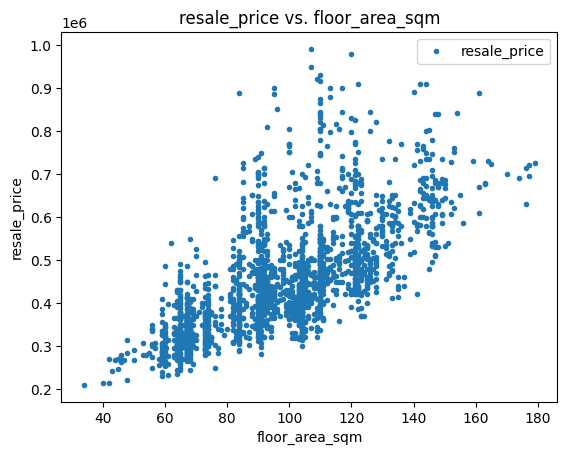

In [53]:
dataset.plot(x='floor_area_sqm', y='resale_price', style='.')
plt.title('resale_price vs. floor_area_sqm')
plt.ylabel('resale_price')
plt.xlabel('floor_area_sqm')
plt.show()

In [54]:
X = dataset[['floor_area_sqm']]
y = dataset['resale_price'].values

In [55]:
y

array([400000., 404000., 422000., ..., 428000., 416000., 445000.])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

99200.12048549199
[3633.15226223]


In [59]:
y_pred = regressor.predict(X_test)

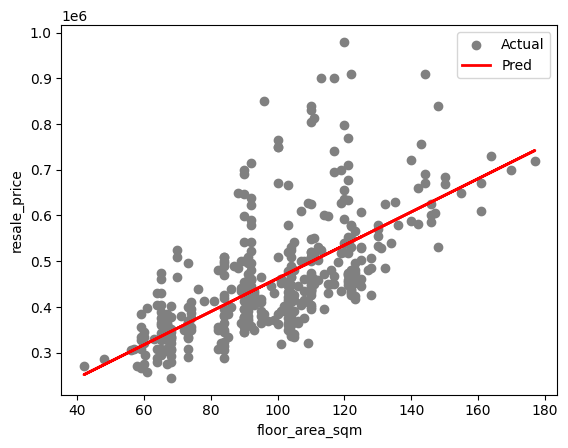

In [60]:
plt.scatter(X_test, y_test,  color='gray', label ='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label ='Pred')
plt.xlabel('floor_area_sqm')
plt.ylabel('resale_price')
plt.legend()
plt.show()

In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Value:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 70357.60138898242
Mean Squared Error: 9993072292.213175
Root Mean Squared Error: 99965.35545984506
R Squared Value: 0.4040821178908327


# Multiple Linear Regression


In [62]:
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-09,CHOA CHU KANG,4 ROOM,119,TECK WHYE LANE,04 TO 06,104.0,Model A,1989,400000.0
1,2012-06,BUKIT MERAH,3 ROOM,22,HAVELOCK RD,04 TO 06,64.0,Standard,1969,404000.0
2,2016-05,JURONG WEST,EXECUTIVE,906,JURONG WEST ST 91,07 TO 09,141.0,Apartment,1989,422000.0
3,2013-10,JURONG WEST,3 ROOM,510,JURONG WEST ST 52,13 TO 15,74.0,Model A,1984,375000.0
4,2015-04,JURONG EAST,4 ROOM,232,JURONG EAST ST 21,07 TO 09,95.0,New Generation,1982,385000.0
...,...,...,...,...,...,...,...,...,...,...
1995,2012-06,TOA PAYOH,3 ROOM,20,LOR 7 TOA PAYOH,07 TO 09,67.0,Improved,1970,353000.0
1996,2012-06,YISHUN,4 ROOM,156,YISHUN ST 11,01 TO 03,93.0,New Generation,1985,400000.0
1997,2015-08,TAMPINES,4 ROOM,155,SIMEI RD,01 TO 03,104.0,Model A,1989,428000.0
1998,2017-02,JURONG WEST,4 ROOM,645,JURONG WEST ST 61,07 TO 09,100.0,Model A,1998,416000.0


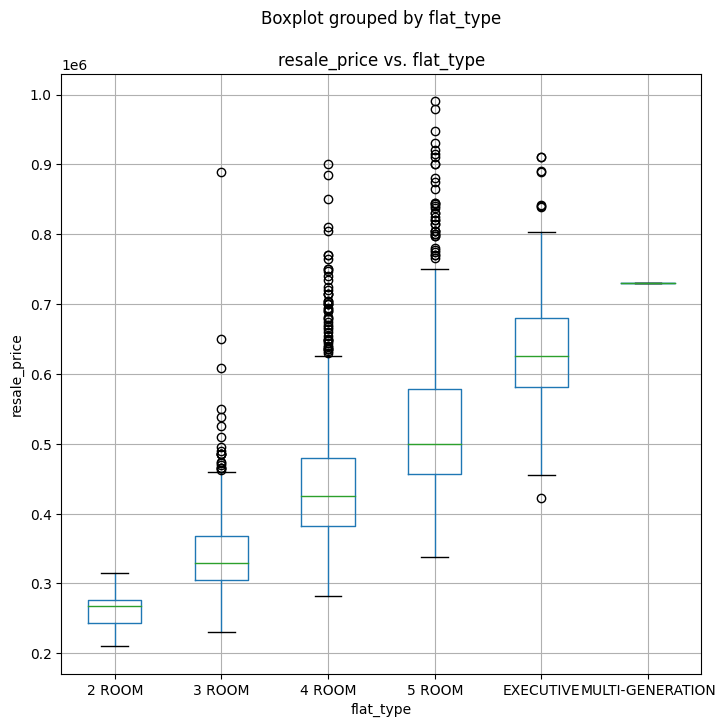

In [63]:
dataset.boxplot(column='resale_price', by='flat_type', figsize =(8, 8))
plt.title('resale_price vs. flat_type')
plt.ylabel('resale_price')
plt.xlabel('flat_type')

plt.show()

In [64]:
dataset.flat_type.value_counts()

4 ROOM              814
3 ROOM              525
5 ROOM              481
EXECUTIVE           161
2 ROOM               18
MULTI-GENERATION      1
Name: flat_type, dtype: int64

In [65]:
mapping = {'2 ROOM':0, '3 ROOM':1, '4 ROOM':2, '5 ROOM':3,'EXECUTIVE':4,'MULTI-GENERATION':5}

In [66]:
dataset['flat_type_num'] = dataset['flat_type'].map(mapping)
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,flat_type_num
0,2012-09,CHOA CHU KANG,4 ROOM,119,TECK WHYE LANE,04 TO 06,104.0,Model A,1989,400000.0,2
1,2012-06,BUKIT MERAH,3 ROOM,22,HAVELOCK RD,04 TO 06,64.0,Standard,1969,404000.0,1
2,2016-05,JURONG WEST,EXECUTIVE,906,JURONG WEST ST 91,07 TO 09,141.0,Apartment,1989,422000.0,4
3,2013-10,JURONG WEST,3 ROOM,510,JURONG WEST ST 52,13 TO 15,74.0,Model A,1984,375000.0,1
4,2015-04,JURONG EAST,4 ROOM,232,JURONG EAST ST 21,07 TO 09,95.0,New Generation,1982,385000.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1995,2012-06,TOA PAYOH,3 ROOM,20,LOR 7 TOA PAYOH,07 TO 09,67.0,Improved,1970,353000.0,1
1996,2012-06,YISHUN,4 ROOM,156,YISHUN ST 11,01 TO 03,93.0,New Generation,1985,400000.0,2
1997,2015-08,TAMPINES,4 ROOM,155,SIMEI RD,01 TO 03,104.0,Model A,1989,428000.0,2
1998,2017-02,JURONG WEST,4 ROOM,645,JURONG WEST ST 61,07 TO 09,100.0,Model A,1998,416000.0,2


In [67]:
X = dataset[['floor_area_sqm', 'flat_type_num']]
y = dataset['resale_price'].values

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [70]:
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

LinearRegression()

In [71]:
#To retrieve the intercept:
print(regressor2.intercept_)
#For retrieving the slope:
print(regressor2.coef_)

451741.233675
[28323.0418062  64318.43776424]


In [72]:
y_pred = regressor2.predict(X_test)

Text(0, 0.5, 'y_pred')

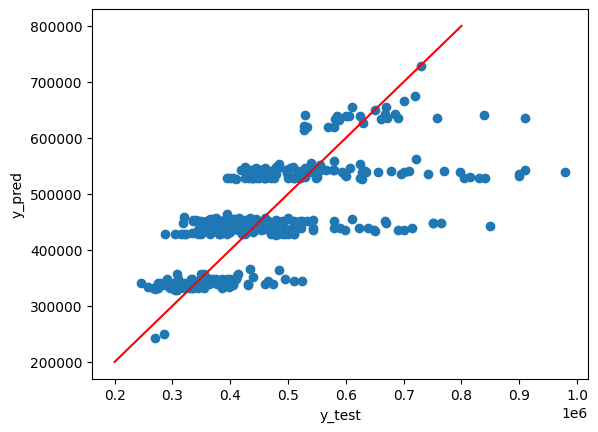

In [73]:
# Visualize y_test & y_pred
plt.scatter(y_test, y_pred)
plt.plot([200000, 800000], [200000,800000], 'r-')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Value:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 70257.33332889486
Mean Squared Error: 9680693409.015291
Root Mean Squared Error: 98390.51483255533
R Squared Value: 0.42271023915799943


# Polynomial Regression

In [75]:
m = 500
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

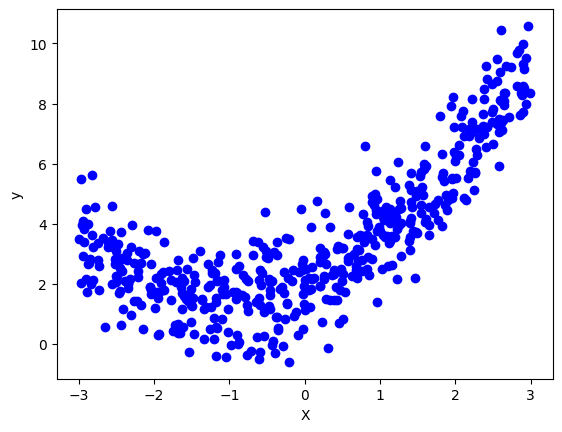

In [76]:
plt.scatter(X, y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_features.fit(X_train)

PolynomialFeatures(include_bias=False)

In [79]:
X_train_poly = poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [80]:
X_train[:3]

array([[-0.3216285 ],
       [ 1.57190212],
       [ 0.71332917]])

In [81]:
X_train_poly[:3]

array([[-0.3216285 ,  0.10344489],
       [ 1.57190212,  2.47087626],
       [ 0.71332917,  0.50883851]])

In [82]:
lin_reg = LinearRegression()

In [83]:
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [84]:
lin_reg.intercept_, lin_reg.coef_

(array([1.96967182]), array([[1.02230103, 0.50616331]]))

The model is very close to:

$$y=\frac{1}{2}x^{2} + x + 2 + N(\mu, \sigma)$$

Let's plot it:

In [85]:
y_pred = lin_reg.predict(X_test_poly)

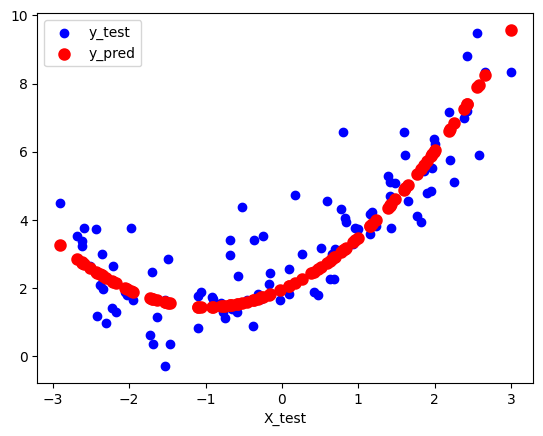

In [86]:
plt.scatter(X_test, y_test, color='blue', label ='y_test')
plt.scatter(X_test, y_pred, color='red', label='y_pred', linewidth=3)
plt.xlabel('X_test')
plt.legend(loc='upper left')
plt.show()

In [87]:
# evaluate the model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Value:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.7705589114350542
Mean Squared Error: 1.0269144415900808
Root Mean Squared Error: 1.0133678708100433
R Squared Value: 0.7451145309434578


In Summary, When we have powers of features, polynomial linear regression is capable of finding non-linear relationships. Which is something a plain linear regression model cannot do. This is made possible by the fact that `PolynomialFeatures` adds all possible combinations of features up to a certain degree.

# Exercise
Use the HDB dataset and build a polynomial regression model to predict resale price

In [88]:
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,flat_type_num
0,2012-09,CHOA CHU KANG,4 ROOM,119,TECK WHYE LANE,04 TO 06,104.0,Model A,1989,400000.0,2
1,2012-06,BUKIT MERAH,3 ROOM,22,HAVELOCK RD,04 TO 06,64.0,Standard,1969,404000.0,1
2,2016-05,JURONG WEST,EXECUTIVE,906,JURONG WEST ST 91,07 TO 09,141.0,Apartment,1989,422000.0,4
3,2013-10,JURONG WEST,3 ROOM,510,JURONG WEST ST 52,13 TO 15,74.0,Model A,1984,375000.0,1
4,2015-04,JURONG EAST,4 ROOM,232,JURONG EAST ST 21,07 TO 09,95.0,New Generation,1982,385000.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1995,2012-06,TOA PAYOH,3 ROOM,20,LOR 7 TOA PAYOH,07 TO 09,67.0,Improved,1970,353000.0,1
1996,2012-06,YISHUN,4 ROOM,156,YISHUN ST 11,01 TO 03,93.0,New Generation,1985,400000.0,2
1997,2015-08,TAMPINES,4 ROOM,155,SIMEI RD,01 TO 03,104.0,Model A,1989,428000.0,2
1998,2017-02,JURONG WEST,4 ROOM,645,JURONG WEST ST 61,07 TO 09,100.0,Model A,1998,416000.0,2


In [89]:
X = dataset[['floor_area_sqm', 'flat_type_num']]
y = dataset['resale_price'].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [92]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_features.fit(X_train)

PolynomialFeatures(include_bias=False)

In [93]:
X_train_poly = poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [94]:
lin_reg = LinearRegression()

In [95]:
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [96]:
lin_reg.intercept_, lin_reg.coef_

(451390.2004352214,
 array([ 28394.20406019,  63934.24766828,  12013.0335808 , -29372.85431509,
         16200.55672627]))

In [97]:
y_pred = lin_reg.predict(X_test_poly)

In [98]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Value:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 70516.36539909765
Mean Squared Error: 9721844973.529179
Root Mean Squared Error: 98599.41669974108
R Squared Value: 0.4202562437846543
